In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

---

## Тема “Обучение без учителя”

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [6]:
boston = load_boston()

In [7]:
data = boston.data
target = boston.target

In [50]:
feature_names = boston.feature_names

In [52]:
X = pd.DataFrame(data, columns=feature_names)
Y = pd.DataFrame(target, columns=['price'])

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [54]:
def data_scaled(x: pd.DataFrame) -> pd.DataFrame:
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, columns=x.columns)

In [55]:
x_train_scaled = data_scaled(x_train)
x_test_scaled = data_scaled(x_test)

In [56]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)

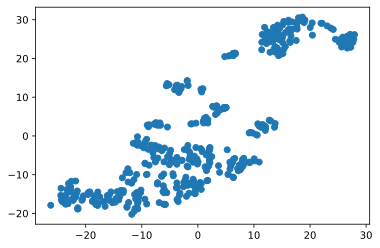

In [57]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

---
#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [58]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [59]:
labels_train = kmeans.fit_predict(x_train_scaled)

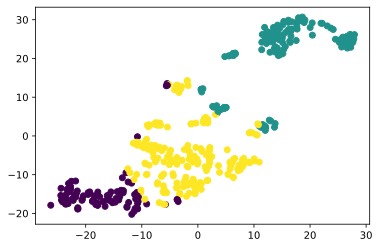

In [60]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)

plt.show()

In [67]:
(y_train[labels_train == 0].mean()[0], x_train.loc[labels_train == 0, 'CRIM'].mean())

(27.78837209302326, 0.07356558139534884)

In [68]:
(y_train[labels_train == 1].mean()[0], x_train.loc[labels_train == 1, 'CRIM'].mean())

(16.165354330708663, 10.797028425196851)

In [69]:
(y_train[labels_train == 2].mean()[0], x_train.loc[labels_train == 2, 'CRIM'].mean())

(24.958115183246072, 0.4216602094240837)

---
#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [70]:
x_test_tsne = tsne.fit_transform(x_test_scaled)

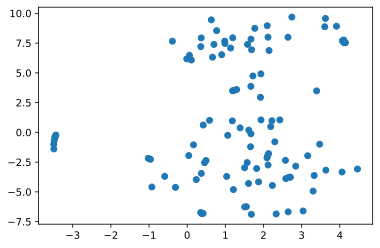

In [71]:
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1])

plt.show()

In [72]:
labels_test = kmeans.fit_predict(x_test_scaled)

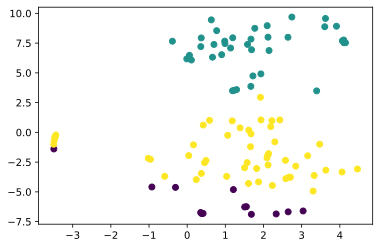

In [73]:
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c=labels_test)

plt.show()

In [82]:
(y_test[labels_test == 0].mean()[0], x_test.loc[labels_test == 0, 'CRIM'].mean())

(34.55384615384616, 0.0830846153846154)

In [83]:
(y_test[labels_test == 1].mean()[0], x_test.loc[labels_test == 1, 'CRIM'].mean())

(16.710526315789473, 9.419181842105264)

In [84]:
(y_test[labels_test == 2].mean()[0], x_test.loc[labels_test == 2, 'CRIM'].mean())

(21.71764705882353, 0.22250117647058823)